In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import models, layers 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = np.arange(10).reshape(1,10,1)
model = models.Sequential()
model.add(layers.SimpleRNN(1, input_shape=(10,1), kernel_initializer=keras.initializers.Ones(), recurrent_initializer=keras.initializers.Ones(), 
                           activation=None, return_sequences=True))
model.summary()
model.layers[0].weights
model.predict(data)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 10, 1)             3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


array([[[ 0.],
        [ 1.],
        [ 3.],
        [ 6.],
        [10.],
        [15.],
        [21.],
        [28.],
        [36.],
        [45.]]], dtype=float32)

In [ ]:
def gen(batch_size, steps):
  frec1,frec2,out1, out2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, steps)
  series = 0.5 * np.sin((time-out1)*(frec1*10+10)) 
  series += 0.2 * np.sin((time-out2)*(frec2*20+20)) 
  series += 0.1 * (np.random.rand(batch_size, steps)-0.5)
  return series[..., np.newaxis].astype(np.float32) 

In [ ]:
n_steps = 50
series = gen(10000, n_steps+1)
X_train, y_train = series[:8000, :n_steps], series[:8000, -1]
X_test, y_test = series[8000:, :n_steps], series[8000:, -1]

In [ ]:
series.shape
X_train.shape
y_train.shape

(8000, 1)

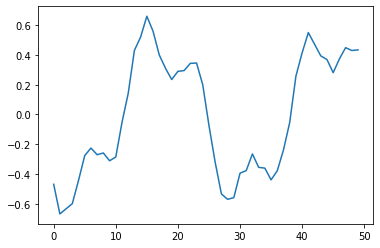

In [ ]:
f, ax = plt.subplots()
ax.plot(np.arange(50), X_train[0])

In [ ]:
m1 = models.Sequential()
m1.add(layers.Flatten(input_shape=(50,1)))
m1.add(layers.Dense(1))
m1.compile(optimizer='adam', loss='mse')
m1.fit(X_train, y_train, epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 1ms/step - loss: 0.0580
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 8/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 9/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 10/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 11/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 12/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 13/20
250/250 [====

In [ ]:
m2 = models.Sequential()
# m2.add(layers.SimpleRNN(1, input_shape=(None,1))
m2.compile(optimizer='adam', loss='mse')
m2.fit(X_train, y_train, epochs=20)

In [ ]:
m2 = models.Sequential()
m2.add(layers.SimpleRNN(20, input_shape=(None,1), return_sequences=True))
m2.add(layers.SimpleRNN(20, return_sequences=True))
m2.add(layers.SimpleRNN(1))
m2.compile(optimizer='adam', loss='mse')
m2.fit(X_train, y_train, epochs=20)

Epoch 1/20
250/250 [==============================] - 7s 23ms/step - loss: 0.0162
Epoch 2/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0041
Epoch 3/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0034
Epoch 4/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0032
Epoch 5/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0031
Epoch 6/20
250/250 [==============================] - 7s 26ms/step - loss: 0.0031
Epoch 7/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0030
Epoch 8/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0030
Epoch 9/20
250/250 [==============================] - 6s 22ms/step - loss: 0.0030
Epoch 10/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0029
Epoch 11/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0029
Epoch 12/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0029
Epoch 13/20
2

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/sell.xlsx', header=0)
data

,월별_수출(천$),기간,전체,반도체,철강제품,승용자동차,석유제품,무선통신기기,선박,자동차부품,컴퓨터주변기기,정밀기기,가전제품
0,201601,1-10,8453665,1108532,699490,267042,421461,566581,857006,404300,139216,147506,128526
1,201601,1-20,22081425,2798444,1713597,1120283,993571,1197717,2302532,1096189,338288,376100,430450
2,201601,1-31,36260420,4590675,2963953,2773742,1684516,1964416,2617192,1871217,552120,597448,696229
3,201602,1-10,8723002,1148994,738513,330477,483390,427479,360863,530185,156696,154552,210700
4,201602,1-20,21967139,2662160,1777030,1234504,1123759,1301971,1512134,1188557,358157,368288,451911
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,202205,1-10,16042304,2798732,1233662,596229,2366601,460960,396621,506005,337158,295724,311464
229,202205,1-20,38547511,6608142,3216826,2224359,4433804,1039848,1188052,1258517,976616,708345,700464
230,202205,1-31,61509507,11716953,5155695,3909811,6435808,1491320,1932894,1894433,1799911,1082749,1067522
231,202206,1-10,15007049,3165364,1214509,623870,1830921,495443,388949,495476,286013,271190,215271


In [ ]:
data.columns

Index(['월별_수출(천$)', '기간', '전체', '반도체', '철강제품', '승용자동차', '석유제품', '무선통신기기', '선박',
       '자동차부품', '컴퓨터주변기기', '정밀기기', '가전제품'],
      dtype='object')

In [ ]:
data.drop(columns=['기간', '전체'], inplace=True)

In [ ]:
pd_data = data.groupby(['월별_수출(천$)']).sum()
pd_data = pd_data.to_numpy()[np.newaxis, :, :]
pd_data = pd_data.T
pd_data.shape

(10, 78, 1)

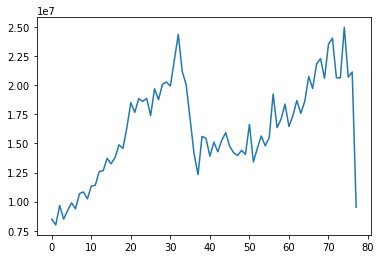

In [ ]:
f, ax = plt.subplots()
ax.plot(np.arange(78), pd_data[0])

In [ ]:
X_train = pd_data[:8, :77, :]
y_train = pd_data[:8, -1]

X_test = pd_data[8:, :77, :]
y_test = pd_data[8:, -1]

In [ ]:
model = models.Sequential()
model.add(layers.Normalization(input_shape=(77,1)))
# model.add(layers.SimpleRNN(1, input_shape=(None, 1), return_sequences=True))
model.add(layers.SimpleRNN(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 794ms/step - loss: 18185338224640.0000
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 18185336127488.0000
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 18185338224640.0000
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 18185338224640.0000
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 18185338224640.0000


In [26]:
pd_data = pd.read_excel('/content/drive/MyDrive/월별_헌혈통계_20220622212931.xlsx', header=0)
pd_data.set_index(['혈액원별(2)'])
print(pd_data.columns)

Index(['혈액원별(1)', '혈액원별(2)', '성별(1)', '2012', '2012.1', '2012.2', '2012.3',
       '2012.4', '2012.5', '2012.6',
       ...
       '2021.14', '2021.15', '2021.16', '2021.17', '2021.18', '2021.19',
       '2021.20', '2021.21', '2021.22', '2021.23'],
      dtype='object', length=243)


/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [58]:
#13 10*12 1
data = pd_data.iloc[11:, :]
data = data.iloc[:, 1::2]
dataidx = data.iloc[:, 0]
data = data.iloc[:,1:].astype('float64') / 100000
data['idx'] = dataidx
data = data.groupby(['idx']).sum()
data = data.T.drop(['소계'], axis=1).T
data = data.to_numpy()[:, :, np.newaxis]
data.shape

(14, 120, 1)

In [62]:
X_train, y_train = data[:13, ...], data[:13, -1]
X_test, y_test = data[13:, ...], data[13:, -1]
X_train.shape

(13, 120, 1)

In [73]:
model = models.Sequential()
model.add(layers.SimpleRNN(20, input_shape=(None,1), return_sequences=True))
model.add(layers.SimpleRNN(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.1148
Epoch 2/10
1/1 [==============================] - 0s 40ms/step - loss: 0.1235
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1081
Epoch 4/10
1/1 [==============================] - 0s 32ms/step - loss: 0.0785
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0539
Epoch 6/10
1/1 [==============================] - 0s 35ms/step - loss: 0.0347
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 0.0148
Epoch 8/10
1/1 [==============================] - 0s 35ms/step - loss: 0.0644
Epoch 9/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0174
Epoch 10/10
1/1 [==============================] - 0s 34ms/step - loss: 0.0403


In [74]:
model.predict(X_test),y_test

(array([[0.4179731]], dtype=float32), array([[0.14952]]))